### Preprocess the data

Next, we need to transform our simulation data into .csv files containing the data we need for our simulations. We can do that using the `preprocess_file` function in the file `preprocess.py`.

In [2]:
import os
import shutil

from spatz.utils.preprocess import preprocess_file


PATH = 'data/simulations/'

# Delete the old folder of preprocessed files.
if os.path.isdir(PATH + 'temp/'):
    shutil.rmtree(PATH + 'temp/')

# Create the folder again.
os.mkdir(PATH + 'temp/')

# Preprocess the files.
for file in os.listdir(PATH):
    if not os.path.isdir(PATH + file) and '.txt' in file:
        df = preprocess_file(PATH + file)
        df.to_csv(PATH + 'temp/' + file.replace('.txt', '.csv'))

### Setup the simulation

First we have to create a simulation instance and specify how we want to iterate through the simulation. We choose to sample data every 0.1 seconds.

In addition, there is the option to add delays in the sampling by adding Gaussian noise to the sampling rate. In this case data might be sampled after 0.1 + noise seconds.

In [3]:
from spatz.simulation import Simulation, UniformTimeSteps

# Construct a time model.
timesteps = UniformTimeSteps(0.1, mu=0, sigma=0, delay_only=True)

# Construct a simulation instance with the time model.
simulation = Simulation(timesteps)

Next, we need to specify the sensors we are using. For this demo we are using the sensors used by Aquila's CAPUT v4. We call `simulation.add_sensor` with the sensor class as an argument to register and create a sensor for the simulation. This allows the sensor to fetch the data.

In [4]:
from spatz.sensors.imu.wsen_isds import WSEN_ISDS_ACC, WSEN_ISDS_GYRO
from spatz.sensors.pressure.ms5611_01ba03 import MS5611_01BA03

press_sensor = simulation.add_sensor(MS5611_01BA03)

# Use the offset argument to change the position of the imu in relation to the rocket's center of gravity.
accelerometer = simulation.add_sensor(WSEN_ISDS_ACC, offset=0)
gyro = simulation.add_sensor(WSEN_ISDS_GYRO, offset=0)

Since we are not only interested in obtaining sensor measurements but also want certain ground truth values, we need to register so-called `Observer` objects. `Observer`s are simular to sensors but don't add any noise or other transformations to the data. Instead, when called they just return the correct values and write them to the logger.

In this demo we will just observe the rocket's altitude in order to compare it with our model's estimation.

In [5]:
altitude = simulation.add_observer(['altitude'])

### Caput Sensor Models & Kalman Filter
Here the sensor models for internal use of the Kalman Fiter are defined to convert sensor readings to usable datapoints

In [6]:
class KF:

    def __init__(self):

        return
    
    def sensor_model():

        return

### Run the simulation

With everything set up, we can load the dataset we want to explore.

In [7]:
simulation.load(PATH + 'temp/' + '7km.csv')

The simulation class has a function `run` which allows us to loop through every time step. The returned values are the index of the current step, the time of the current step and the change in time since the last time step.

In each iteration we can call the sensors like functions to obtain the measurements at the current time steps. Please note that calling sensors multiple times at the same time steps may result in different measurements.

In [8]:
def log_state_vector(_logger, _state):

    _logger.write("pos_X", _state[0], 'state')

In [ ]:
class KF:

    def __init__(self):

        self.state = [ 0, #pos_X
                        0, #pos_Y
                        0, #pos_Z
                        0, #vel_X
                        0, #vel_Y
                        0, #vel_Z
                        0, #q1
                        0, #q2
                        0, #q3
                        0  #q4
                        ]
        

    def predict_state(self):
        return
    
    def correct_state_IMU(self, z):
        return
    
    def correct_state_BARO(self, z):
        return
    
    def correct_state_GNSS(self, z):
        return

In [9]:
import math
logger = simulation.get_logger()
filter = KF()

# Set verbose to False to disable the progress bar
for step, t, dt in simulation.run(verbose=True):
    # Get the sensor data for the current time
    press = press_sensor()
    acc = accelerometer()
    rot_rate = gyro()

    

    # Get the correct altitude data.
    alt = altitude()

    # TODO: Add your computation here.

    # preprocess your data here
    baro_alt = (288.15/0.0065) * (1 - pow(press/1013.25, 1/5.255))

    # TODO: Filter data here


    # Save outputs from your computation here
    logger.write("predicted_altitude", baro_alt, 'general')
    
    logger.write("pos_X", 0, 'state')
    logger.write("pos_Y", 0, 'state')
    logger.write("pos_Z", baro_alt, 'state')

    logger.write("vel_X", 0, 'state')
    logger.write("vel_Y", 0, 'state')
    logger.write("vel_Z", 0, 'state')




  1%|          | 2.1000000000000005/345.0 [00:00<00:31, 10.80it/s]

100%|█████████▉| 344.9000000000099/345.0 [00:14<00:00, 24.57it/s] 


In [10]:
df = logger.get_dataframe()

df

time    0 MS5611_01BA03/ts_effects mach/mach_no mach/speedofsound  \
0       0.1  NaN                      0.0     0.007016        339.067143   
1       0.2  NaN                      0.0     0.013913        339.065795   
2       0.3  NaN                      0.0     0.020692        339.063569   
3       0.4  NaN                      0.0     0.027351        339.060477   
4       0.5  NaN                      0.0     0.033927        339.056534   
...     ...  ...                      ...          ...               ...   
3444  344.5  NaN                      0.0     0.015286        339.111824   
3445  344.6  NaN                      0.0     0.015286         339.11382   
3446  344.7  NaN                      0.0     0.015285        339.115816   
3447  344.8  NaN                      0.0     0.015285        339.117812   
3448  344.9  NaN                      0.0     0.015284        339.119808   

     MS5611_01BA03/noise MS5611_01BA03/out WSEN_ISDS_ACC/FL_x  \
0               1.014128        976.512606               -0.0   
1               0.010273        975.467987               -0.0   
2              -0.794974        974.595411               -0.0   
3              -0.778799        974.518089                0.0   
4               1.321533        976.499203               -0.0   
...                  ...               ...                ...   
3444            0.367679        977.218257               -0.0   
3445              2.5935        979.504528               -0.0   
3446             2.77665         979.74813               -0.0   
3447             1.23878         978.27071               -0.0   
3448            1.182087        978.274469               -0.0   

     WSEN_ISDS_ACC/FL_y WSEN_ISDS_ACC/FL_z  ... WSEN_ISDS_GYRO/out_1  \
0              4.044397          33.066113  ...                  0.0   
1               3.97431          32.663091  ...                  0.0   
2              3.903998          32.258775  ...                  0.0   
3               3.83641          31.870123  ...                  0.0   
4              3.808092           31.70728  ...                  0.0   
...                 ...                ...  ...                  ...   
3444                0.0           9.811295  ...                  0.0   
3445                0.0           9.811295  ...                  0.0   
3446                0.0           9.811295  ...                  0.0   
3447                0.0           9.811295  ...                  0.0   
3448                0.0           9.811295  ...                  0.0   

     WSEN_ISDS_GYRO/out_2 general/altitude general/predicted_altitude  \
0                     0.0       319.117737                 310.451543   
1                     0.0       319.467704                 319.416512   
2                     0.0       320.045754                 326.910955   
3                     0.0       320.848534                 327.575329   
4                     0.0       321.872233                  310.56652   
...                   ...              ...                        ...   
3444                  0.0       307.516651                  304.40001   
3445                  0.0         306.9983                 284.817635   
3446                  0.0       306.479948                 282.733321   
3447                  0.0       305.961597                 295.380933   
3448                  0.0       305.443246                 295.348739   

     state/pos_X state/pos_Y state/pos_Z state/vel_X state/vel_Y state/vel_Z  
0              0           0  310.451543           0           0           0  
1              0           0  319.416512           0           0           0  
2              0           0  326.910955           0           0           0  
3              0           0  327.575329           0           0           0  
4              0           0   310.56652           0           0           0  
...          ...         ...         ...         ...         ...         ...  
3444           0  

### Cost function implementation here

In [11]:
def weighted_least_square_cost_function(_logger):

    
    


SyntaxError: incomplete input (103588742.py, line 4)

### Do your research

In [ ]:
import matplotlib.pyplot as plt

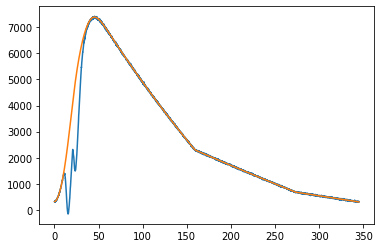

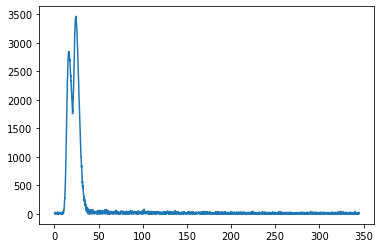

In [ ]:
plt.plot(df['time'][1:], df['general/predicted_altitude'][1:], label='predicted_altitude')
plt.plot(df['time'][1:], df['general/altitude'][1:], label='general/altitude')
plt.show()
plt.plot(df['time'][1:], df['general/altitude_error'][1:], label='altitude_error')
plt.show()

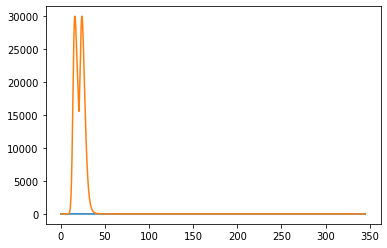

In [ ]:
plt.plot(df['time'][1:], df['mach/mach_no'][1:], label='mach number')
plt.plot(df['time'][1:], df['MS5611_01BA03/ts_effects'][1:], label='ts effects')
plt.show()

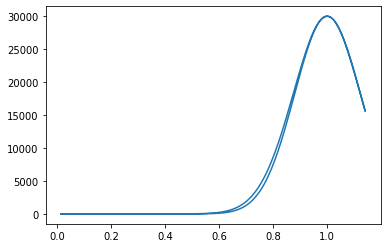

In [ ]:
plt.plot(df['mach/mach_no'][1:], df['MS5611_01BA03/ts_effects'][1:])
plt.show()

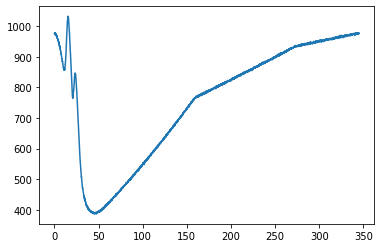

In [ ]:
plt.plot(df['time'][1:], df['MS5611_01BA03/out'][1:])
plt.show()

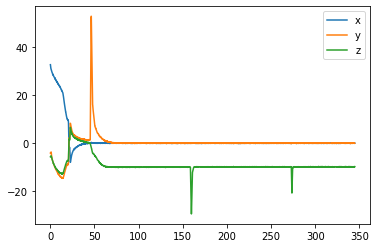

In [ ]:
plt.plot(df['time'], df['WSEN_ISDS_ACC/out_0'], label='x')
plt.plot(df['time'], df['WSEN_ISDS_ACC/out_1'], label='y')
plt.plot(df['time'], df['WSEN_ISDS_ACC/out_2'], label='z')
plt.legend()
plt.show()